# African Airlines Sentiment Analysis (2015-Present)
**Data Exploration**

### 1. Library Importation

In [37]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
from wordcloud import WordCloud
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Loading the Data

In [152]:
#Dataframe with more preprocessing steps carried out on review texts
airlines_df = pd.read_csv('../data/interim/airlines_reduced.csv',index_col=0)

#Dataframe with more preprocessing steps carried out on review texts and sentiment categories
processed_df = pd.read_csv('../data/processed/airlines_processed.csv',index_col=0)

### 3. Data Exploration 

#### a. Number of reviews by airlines

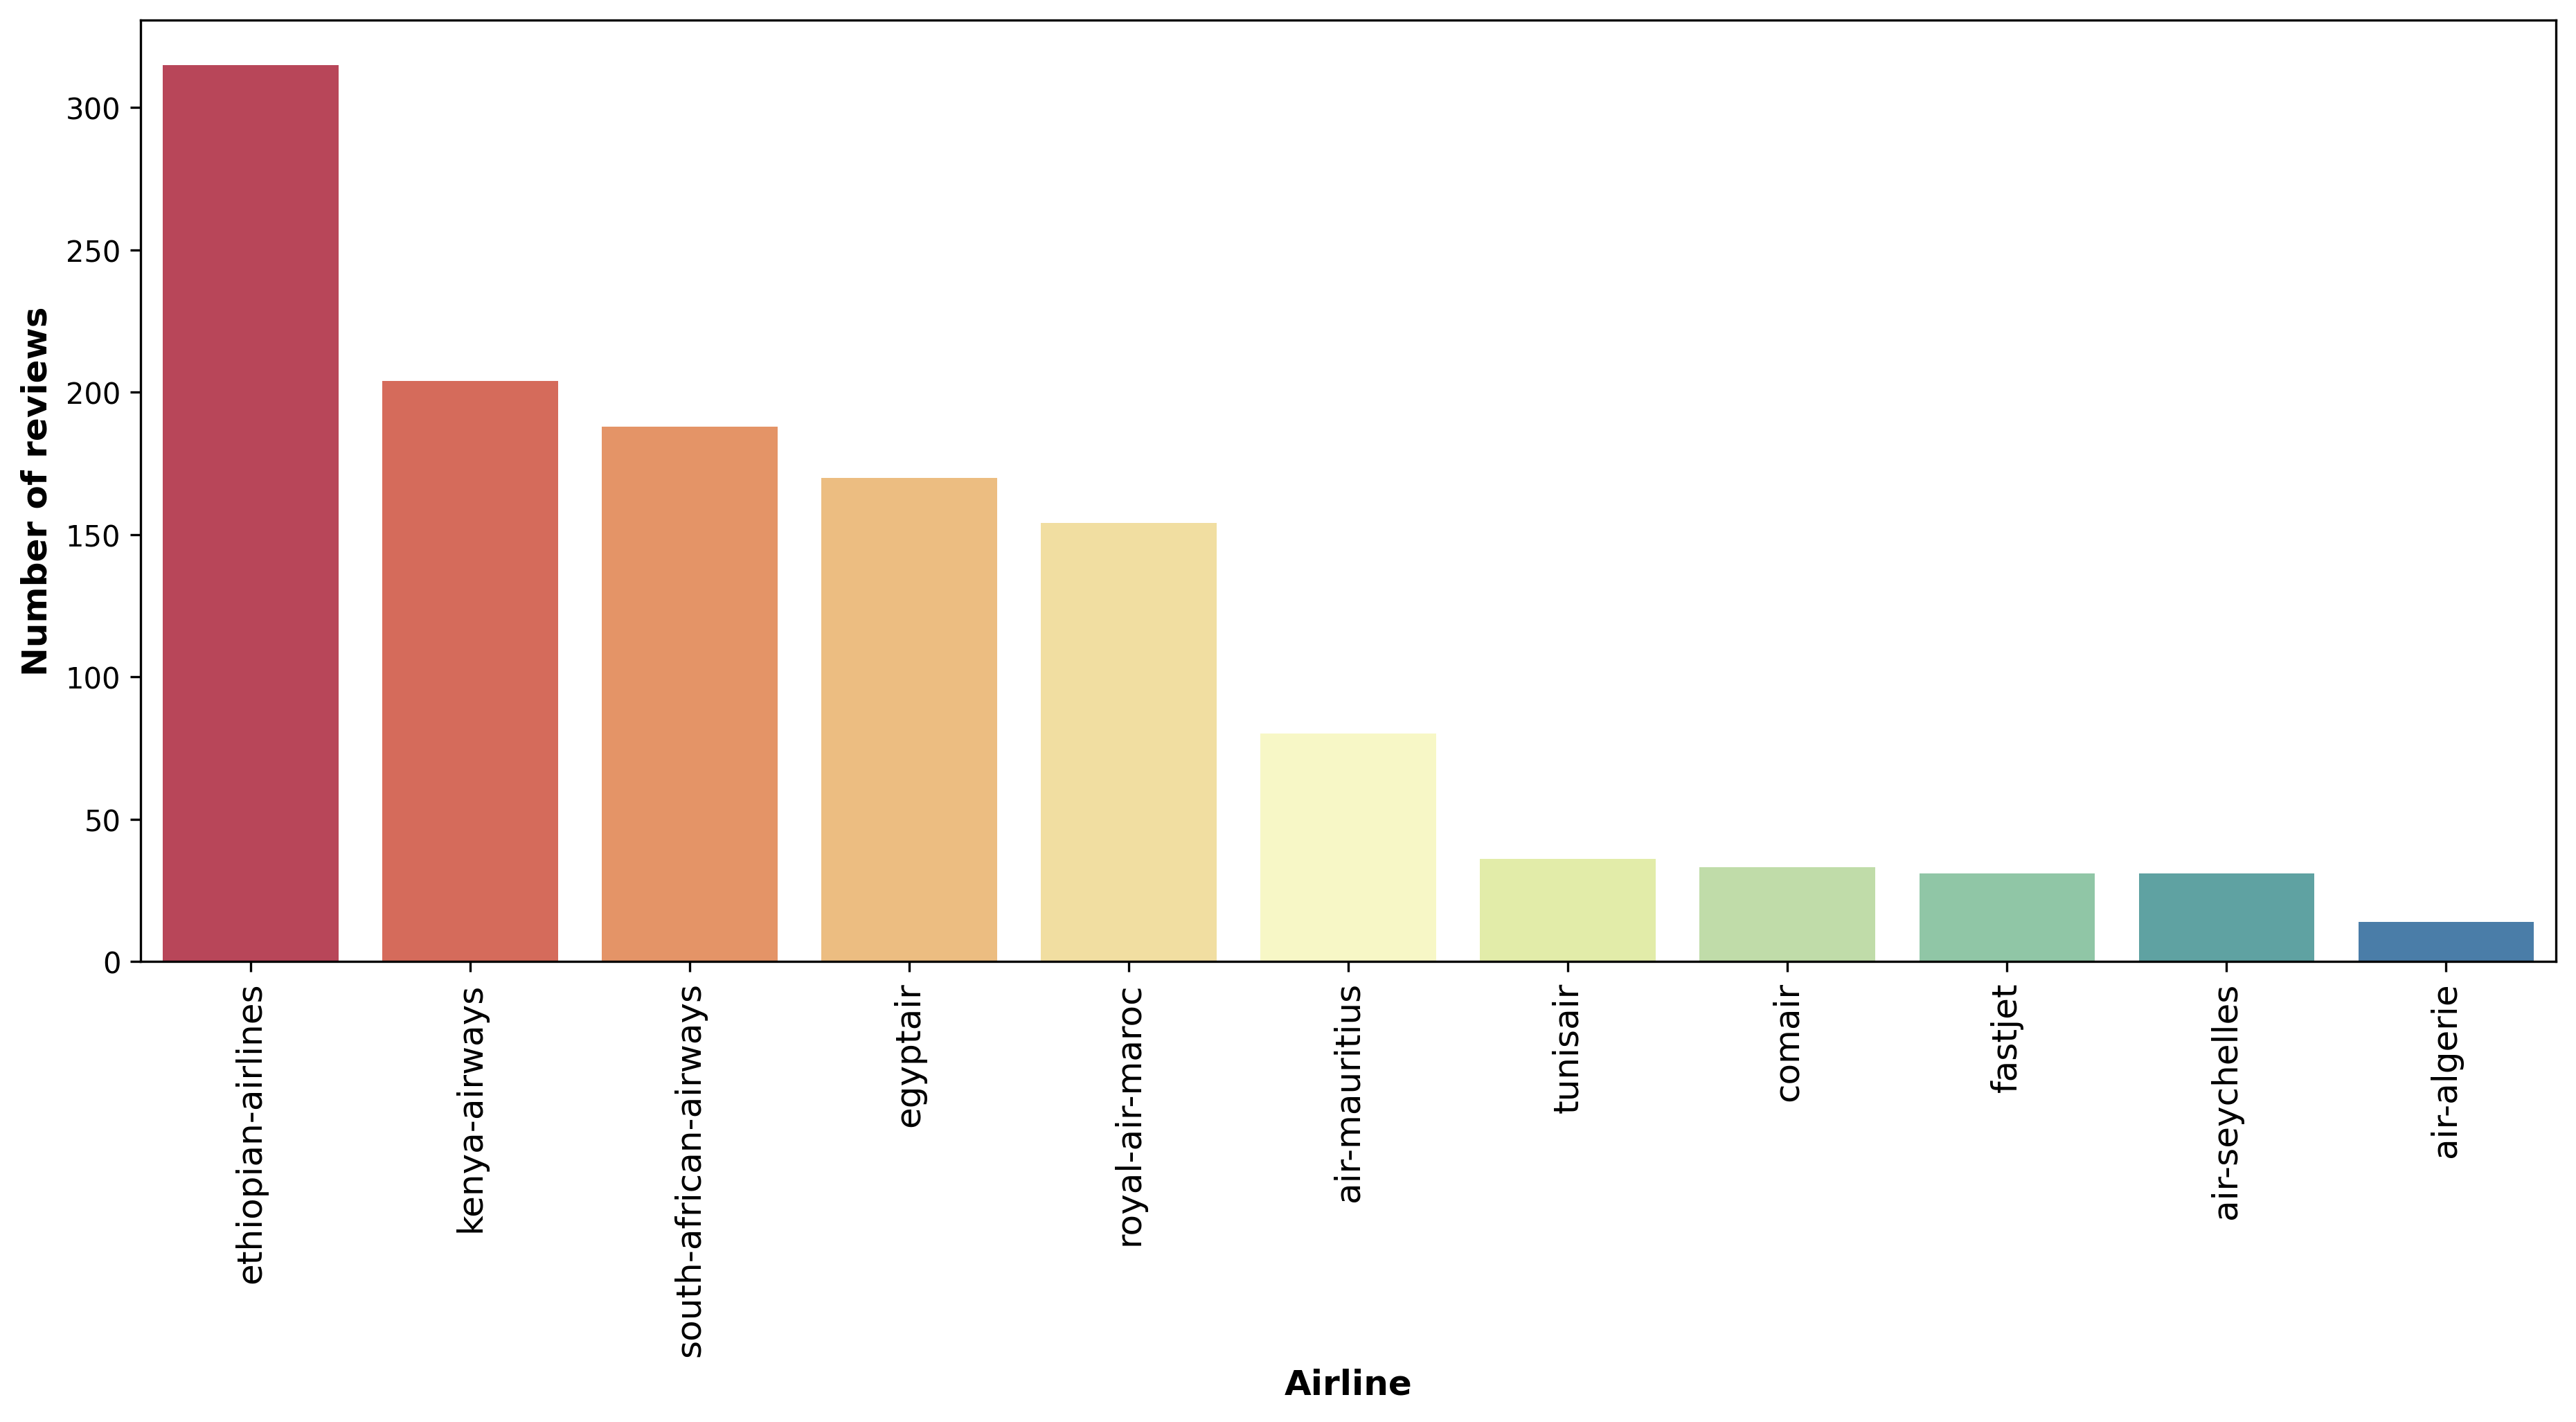

In [88]:
plt.figure(figsize = (15, 6), dpi=300)
dbar = sns.countplot(x = 'Subject', data = airlines_df,order= airlines_df.Subject.value_counts().index, 
                     palette = "Spectral")
plt.ylabel('Number of reviews',fontsize=12, fontweight= 'bold')
plt.xlabel('Airline',fontsize=12, fontweight= 'bold')
plt.xticks(rotation = 90, fontsize=12)
plt.show()

In [104]:
#Get the bar colors from the countplot above
bar_colors = [container.get_facecolor() for container in dbar.containers[0]]

#Get the order of x-tick labels
x_tick_texts = [t.get_text()  for t in dbar.get_xticklabels()]

#Create a map of the airlines and their colors
airline_color_map = dict(zip(x_tick_texts,bar_colors))

#### b. Attributes Average Rating for the Different Airlines

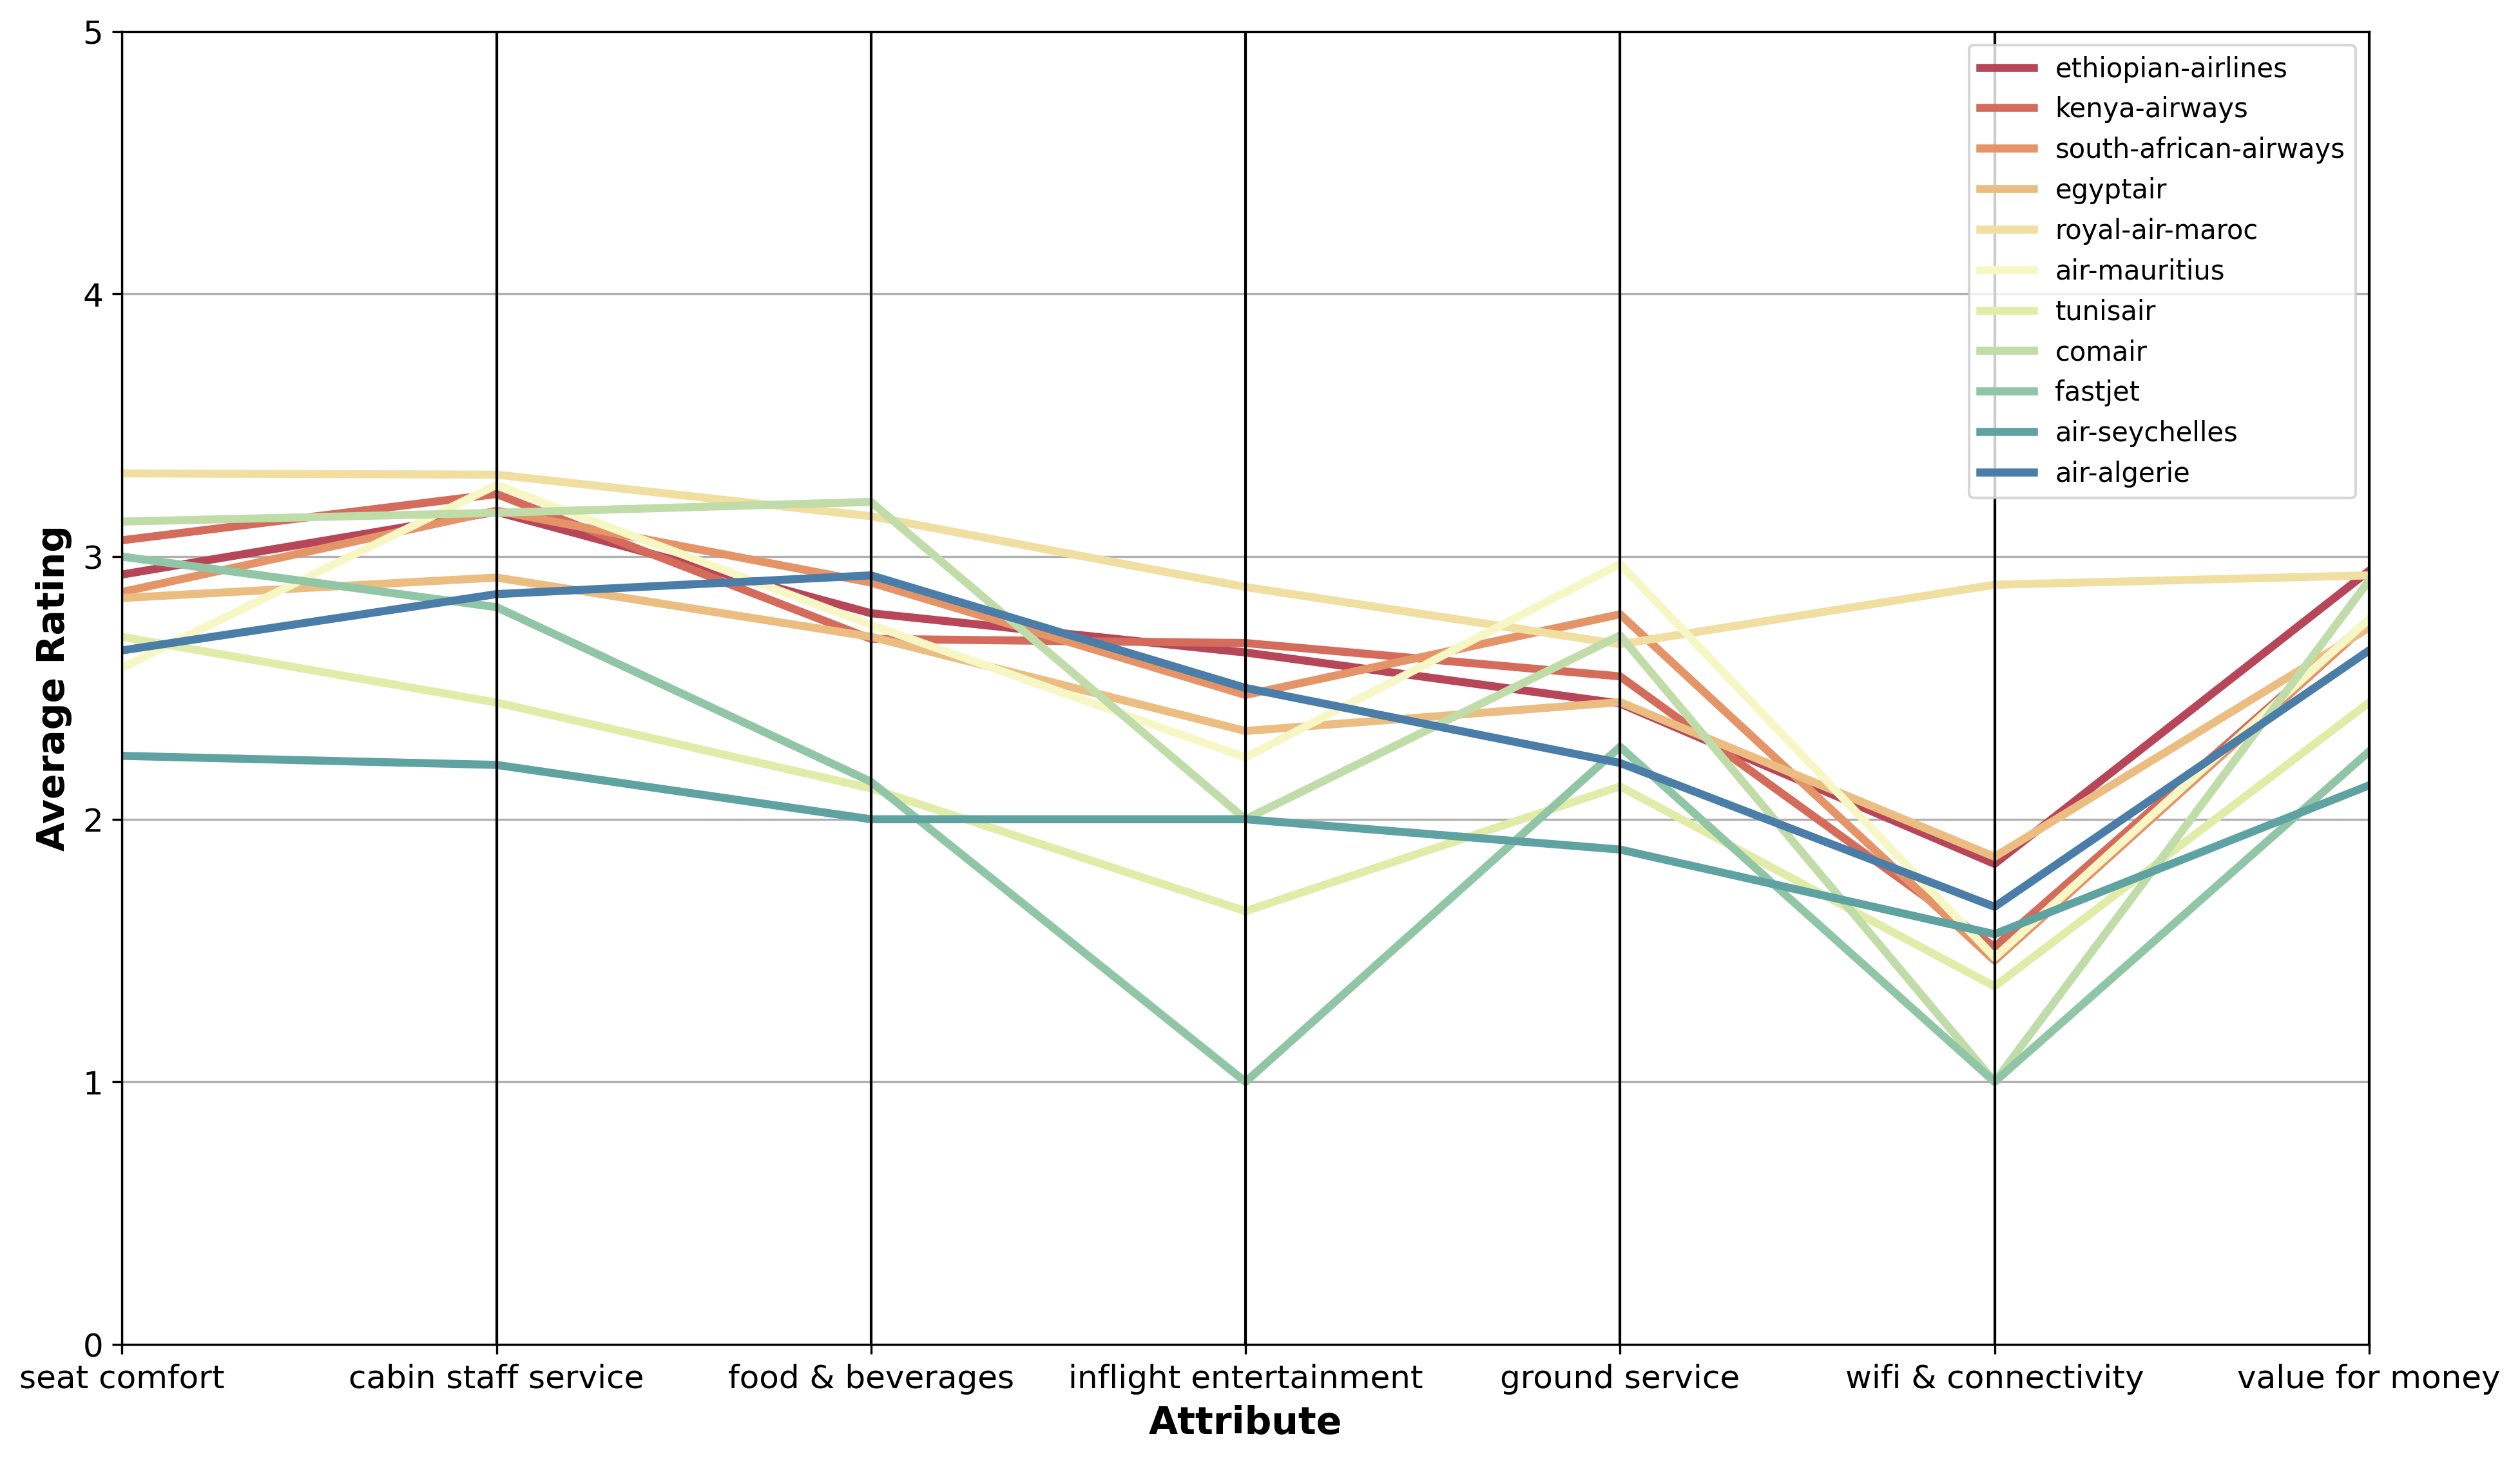

In [150]:
#Calculate the average ratings across the different attributes
parallel_plot_df = airlines_df.groupby('Subject')[airlines_df.columns[6:-1]].mean().reset_index()

#Remove '_' from attribute names 
parallel_plot_df.columns = parallel_plot_df.columns.str.replace('_',' ')

#Reorder the dataframe so colors can be assigned to match the barplot above
parallel_plot_df = parallel_plot_df.set_index('Subject').reindex(x_tick_texts).reset_index()

#Create plot
plt.figure(figsize=(15, 9), dpi=300)
parallel_coordinates(parallel_plot_df,'Subject',color=bar_colors, linewidth=3).set_ylim(0, 5)
plt.ylabel('Average Rating',fontsize=14, fontweight= 'bold')
plt.xlabel('Attribute',fontsize=14, fontweight= 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

- A lot of the average ratings clustered around 2 to 3 (out of 5), which can be interpreted as fair or okay at best.
- All average attribute ratings for any airline or attribute were at most (roughly) 3 (out of 5), which can be interpreted as fair or okay at best.
- Most airlines were rated poorly on wifi & connectivity, with all except Royal Air Maroc having an average rating below 2
- Air Seychelles ranked lowest overall on most attributes, while Fastjet and Tunisair were also at the bottom of the list. However, these airlines had much fewer ratings than the others.
- Royal Air Maroc was rated highest for most attributes, and it had a large number of reviews (about 150).
- Despite being Africa's largest airline, Ethiopian Airlines tended to rank around mid-place on most attributes, sometimes making it into the top three.

#### c. Recommendation rate for the different airlines

In [106]:
recommendation_rates = airlines_df.groupby('Subject')['recommended'].mean().sort_values().reset_index()

recommendation_rates['color'] = recommendation_rates.Subject.map(airline_color_map)

recommendation_rates.head()

Subject  recommended  \
0  air-seychelles     0.225806   
1         fastjet     0.290323   
2        tunisair     0.333333   
3     air-algerie     0.357143   
4        egyptair     0.388235   

                                               color  
0  (0.37208765859284887, 0.6364475201845444, 0.63...  
1  (0.5627450980392158, 0.77520184544406, 0.65115...  
2  (0.8863802383698577, 0.9235774702037678, 0.663...  
3  (0.2885236447520184, 0.4890426758938869, 0.660...  
4  (0.9236928104575164, 0.7393790849673201, 0.505...

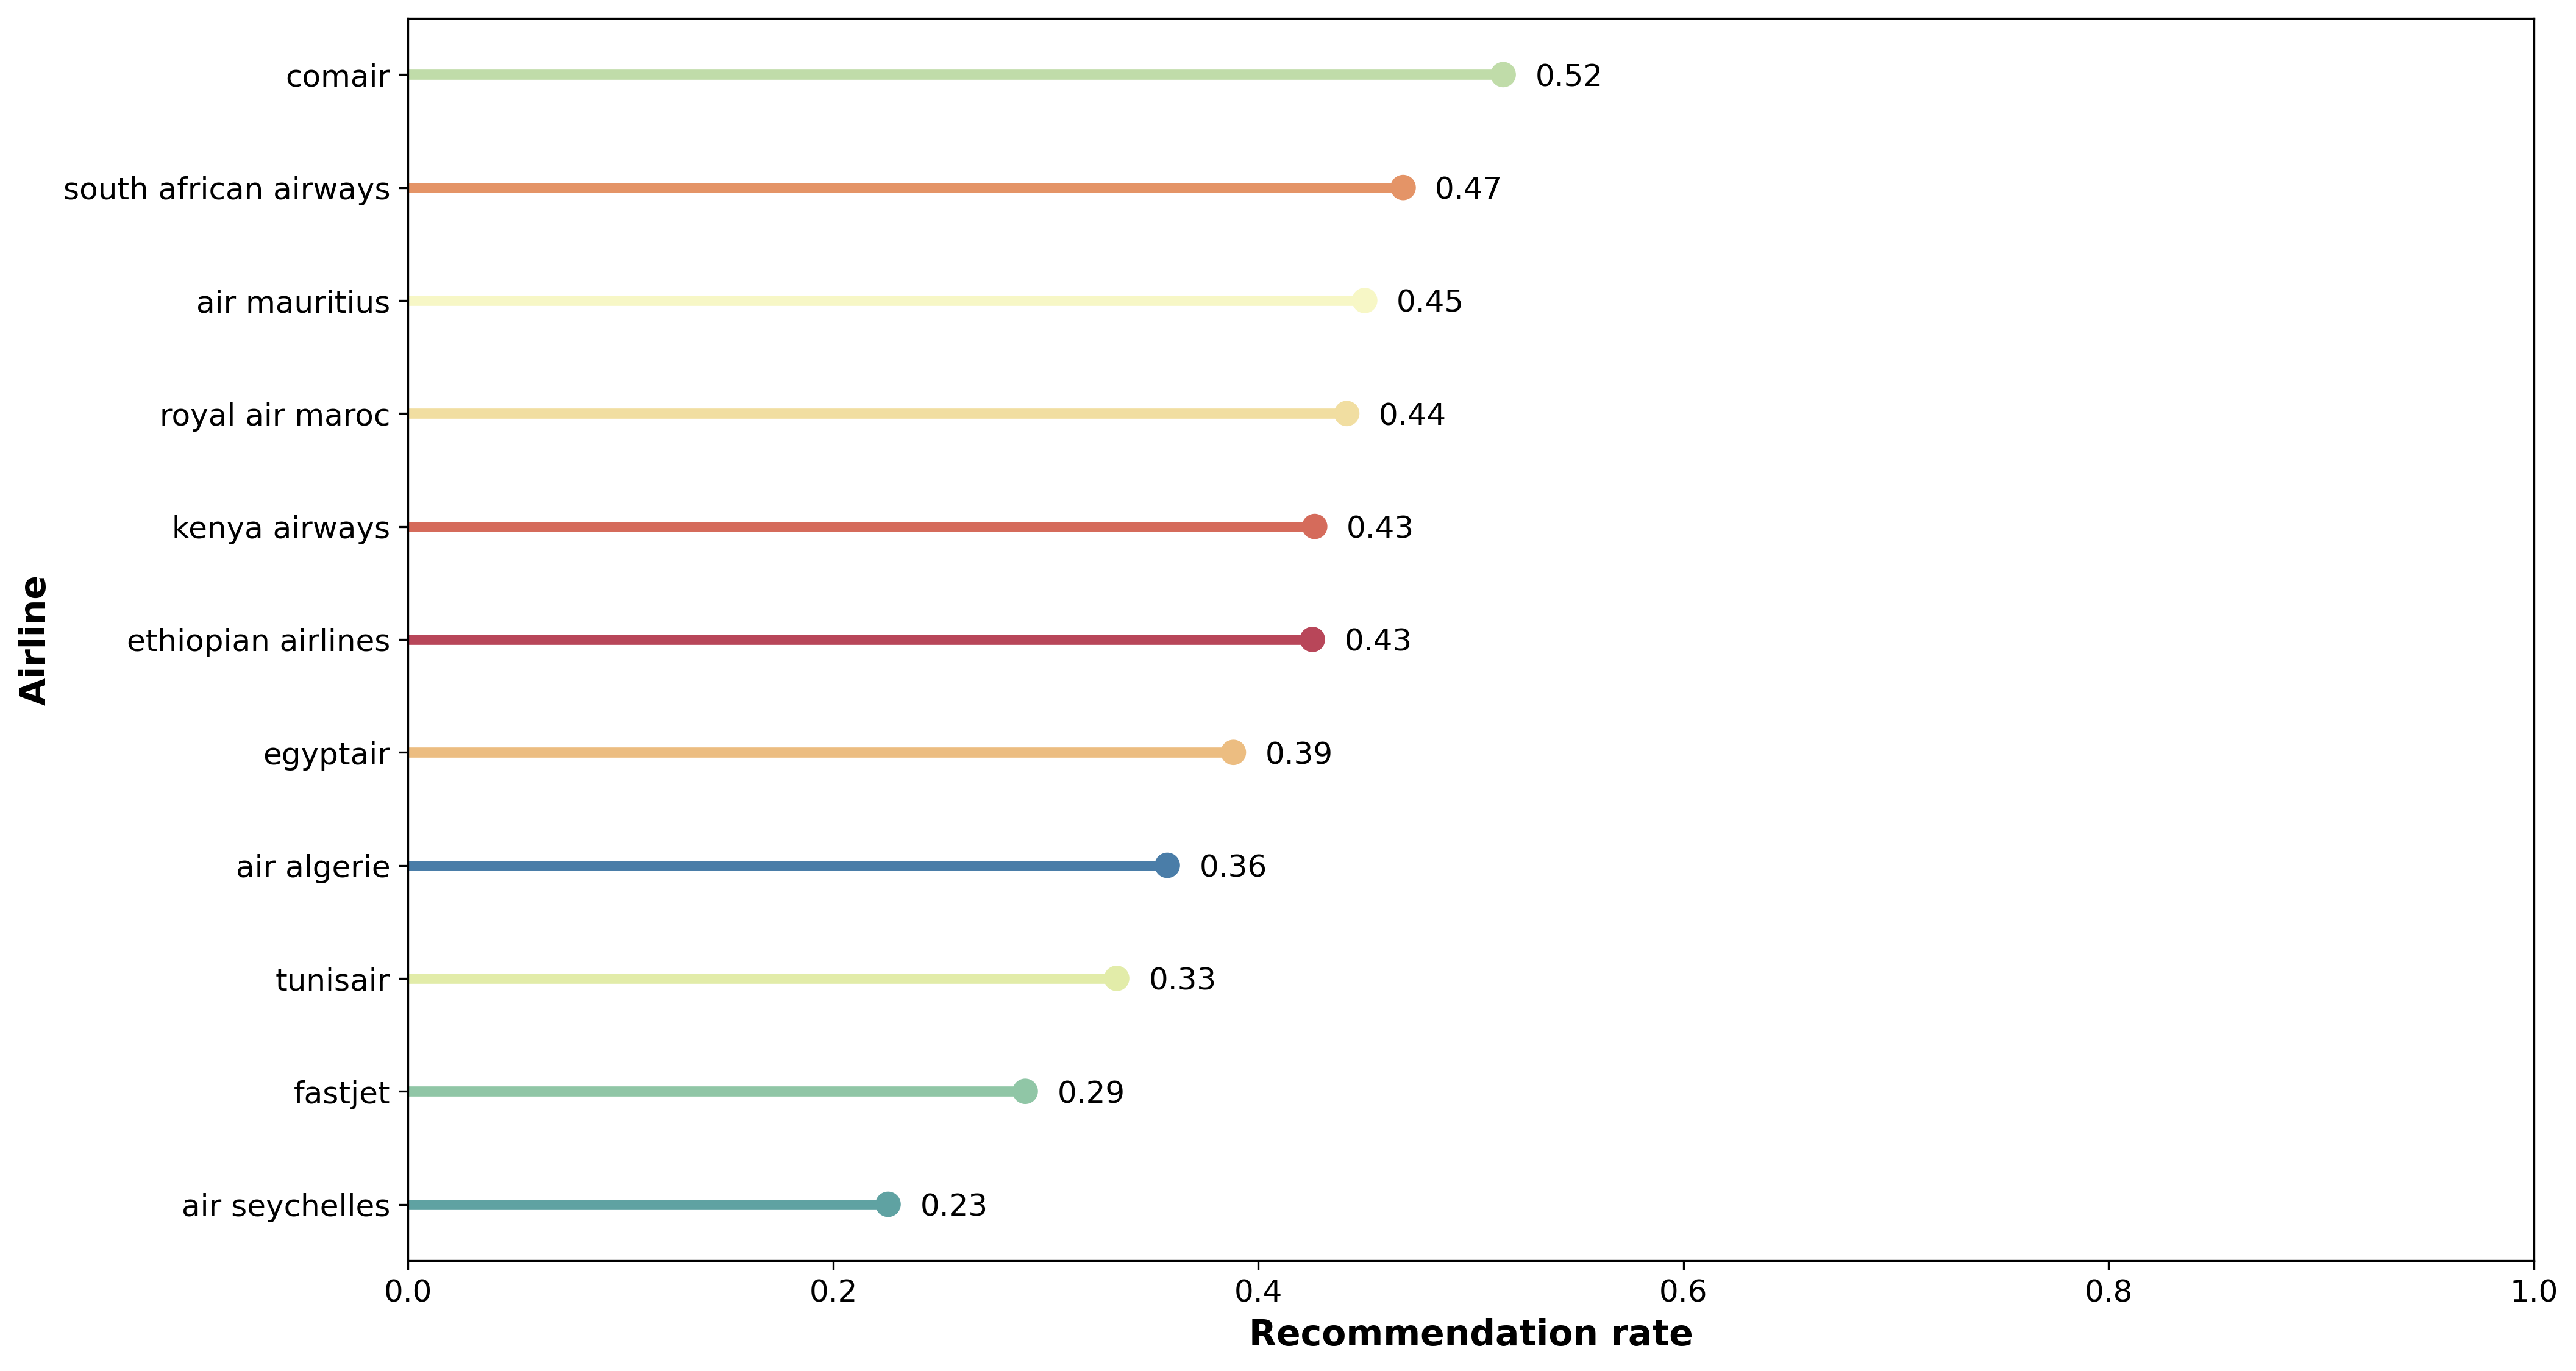

In [149]:
#Reorder it based on the values
plot_range = [*range(1,len(recommendation_rates)+1)]
plot_color = recommendation_rates['color']

plt.figure(figsize=(15, 9), dpi=300)

#The horizontal plot is made using the hline function
plt.hlines(y= plot_range, 
           xmin=0, 
           xmax=recommendation_rates['recommended'], 
           linewidth=4,
           color=plot_color)

plt.scatter(recommendation_rates['recommended'], plot_range, color=plot_color, linewidth=4)

plt.xlim(0,1)


#Add titles and axis names
plt.yticks(plot_range, recommendation_rates.Subject.str.replace('-',' '),fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Recommendation rate',fontsize=14, fontweight= 'bold')
plt.ylabel('Airline', fontsize=14, fontweight= 'bold')

for idx in range(len(plot_range)):
    
    plt.text(recommendation_rates['recommended'][idx]+0.015,
             plot_range[idx]-0.10, 
             str(round(recommendation_rates['recommended'][idx],2)), 
             fontsize = 12)

plt.show()

- The highest recommendation rate (corresponding to comair) was just above 0.5, suggesting at most a ~50% chance of a flyer recommending any of these airlines. Not ideal

In [159]:
sentiment_data.unstack()

variable                 
value                 Negative Neutral Positive
Subject                                        
air-algerie                 42      10       25
air-mauritius              221      78      172
air-seychelles             126      23       31
comair                      48      42       60
egyptair                   454     180      325
ethiopian-airlines         801     318      655
fastjet                     79      16       40
kenya-airways              511     220      417
royal-air-maroc            324     139      362
south-african-airways      449     202      382
tunisair                   123      33       48

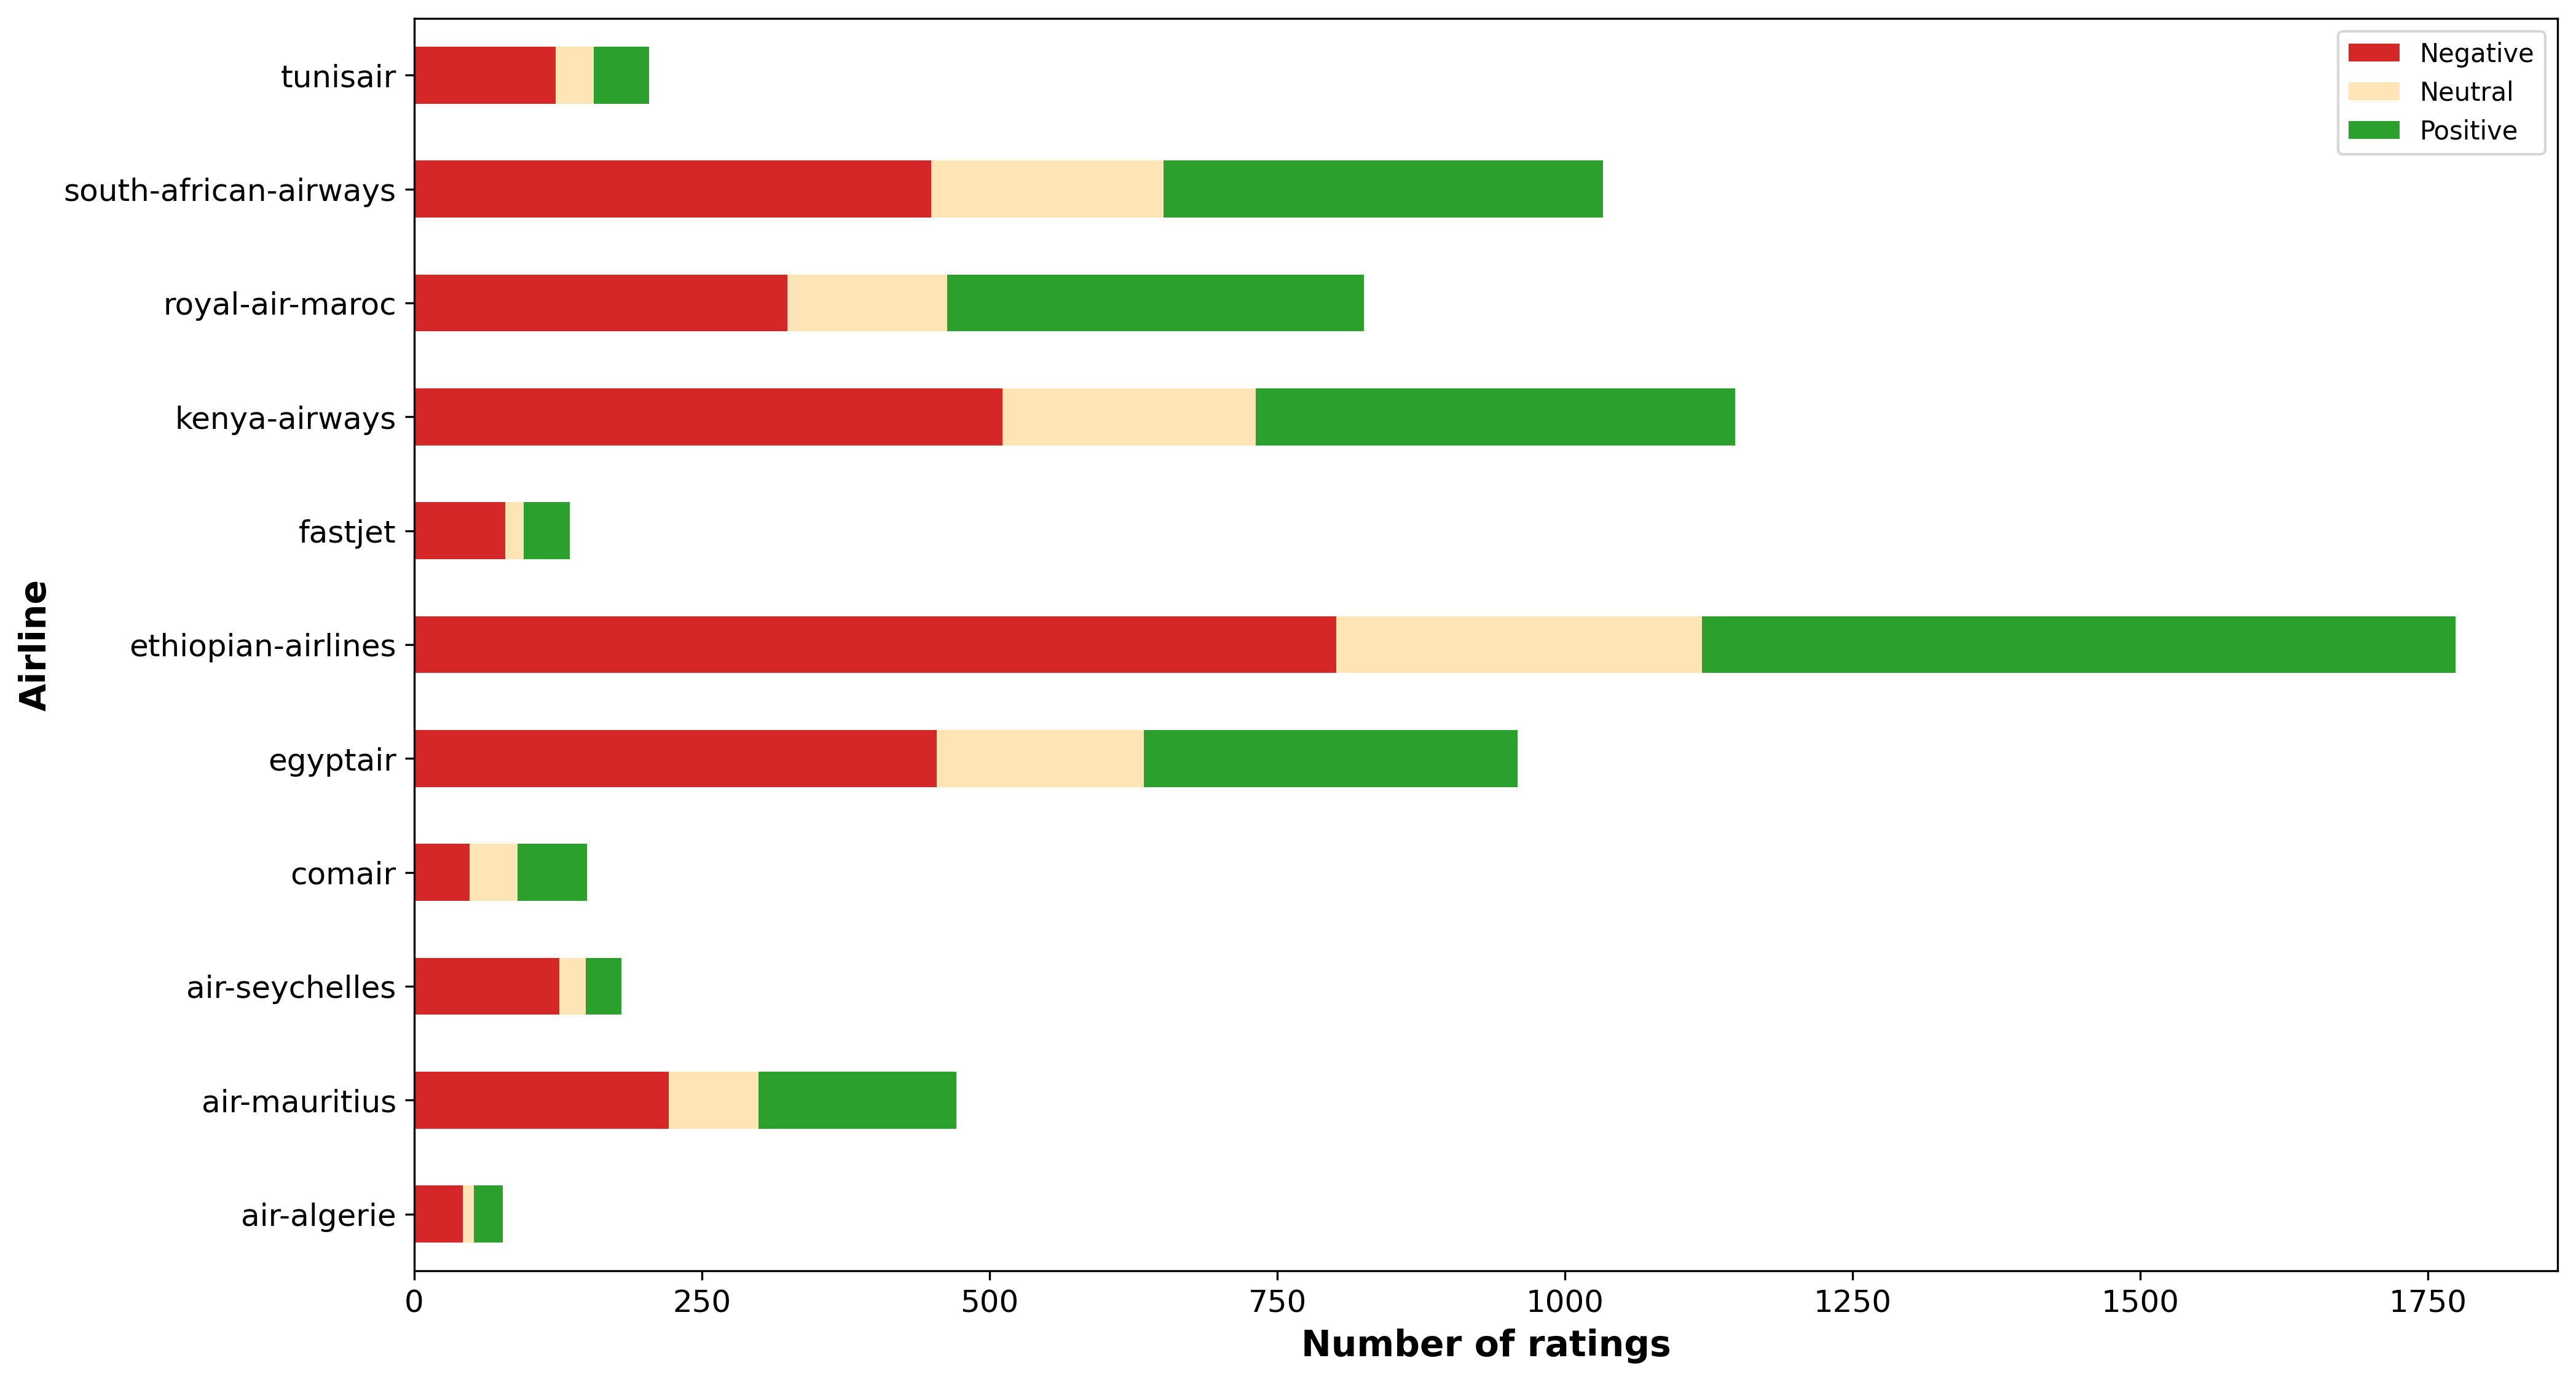

In [165]:
#List to indicate the indices of the attribute columns
idx = [0,6,7,8,9,10,11,12]

#Group by airline and sentiment (e.g. Positive) and count the number of ratings 
sentiment_data = processed_df.iloc[:,idx].melt('Subject').groupby(['Subject','value']).count()

#Increase dpi
plt.rcParams["figure.dpi"] = 300

#Plot a stacked bar chart to visualize the proportion across the different sentiments

sentiment_data.unstack().plot(kind='barh', 
                              stacked=True, 
                              color=['tab:red','moccasin','tab:green'],
                              fontsize = 12,
                              figsize=(15, 9))

#Plot formatting: Legend and labels
plt.legend(labels=['Negative','Neutral','Positive'])
plt.xlabel('Number of ratings', fontsize=14, fontweight= 'bold')
plt.ylabel('Airline', fontsize=14, fontweight= 'bold')

#Show plot
plt.show()

#### d. Word Frequency

**What is the distribution of recommended vs. not recommended**

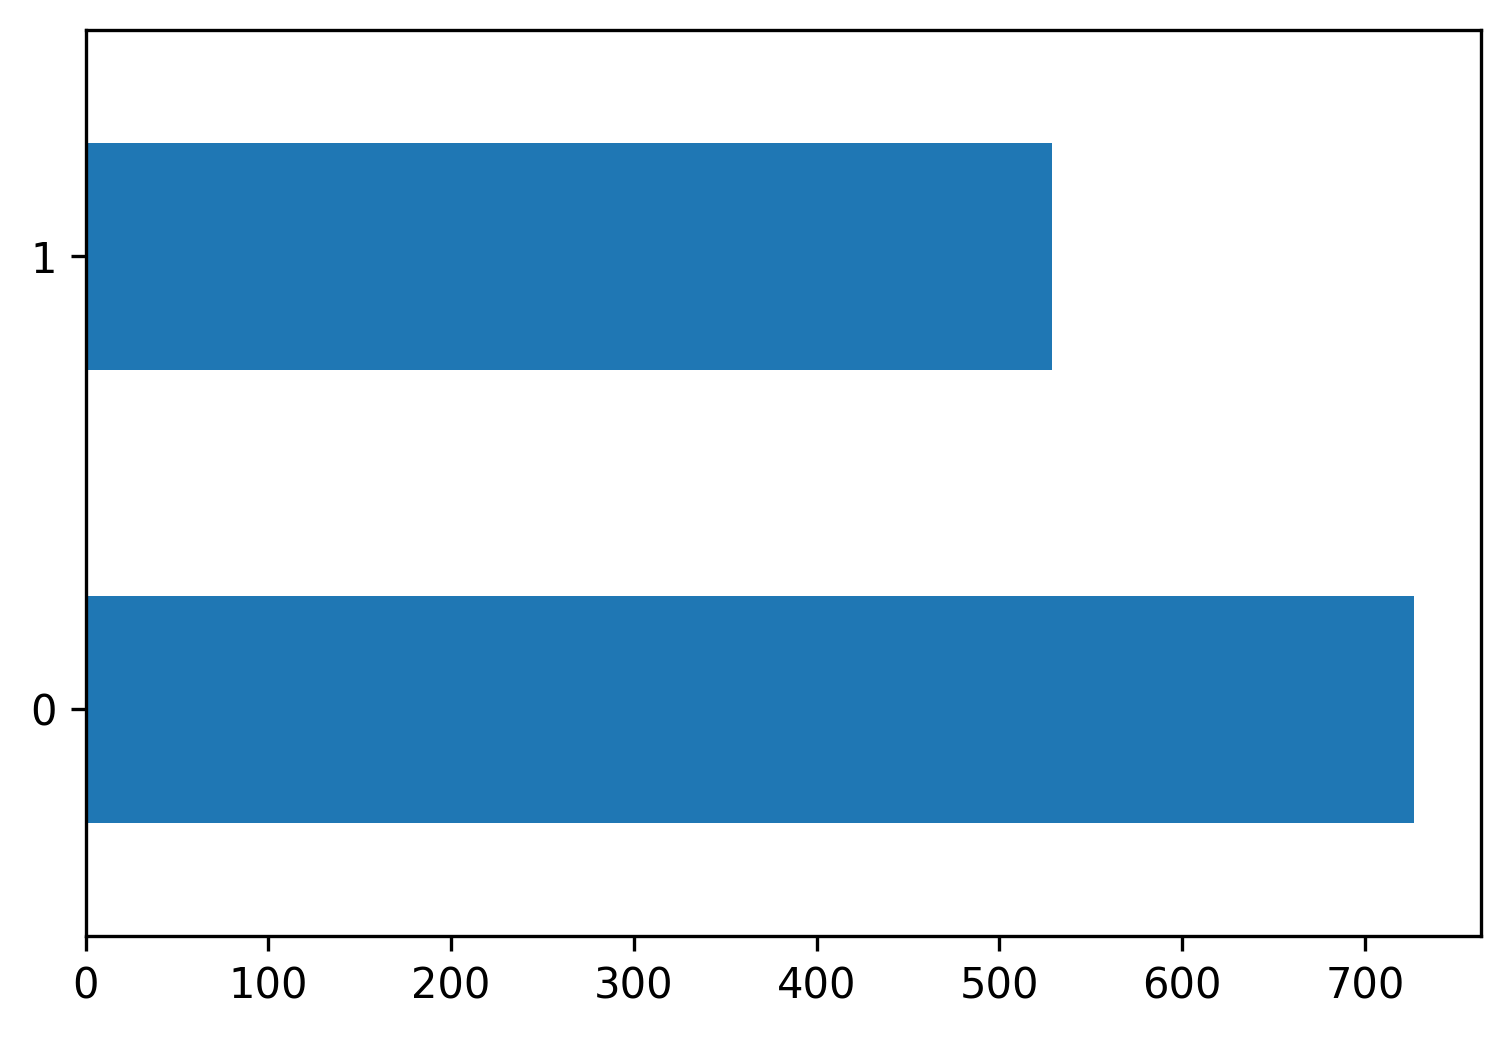

In [177]:
airlines_df.recommended.value_counts().plot(kind='barh')
plt.show()

**Most frequent words for positive (proxy:recommended) reviews**

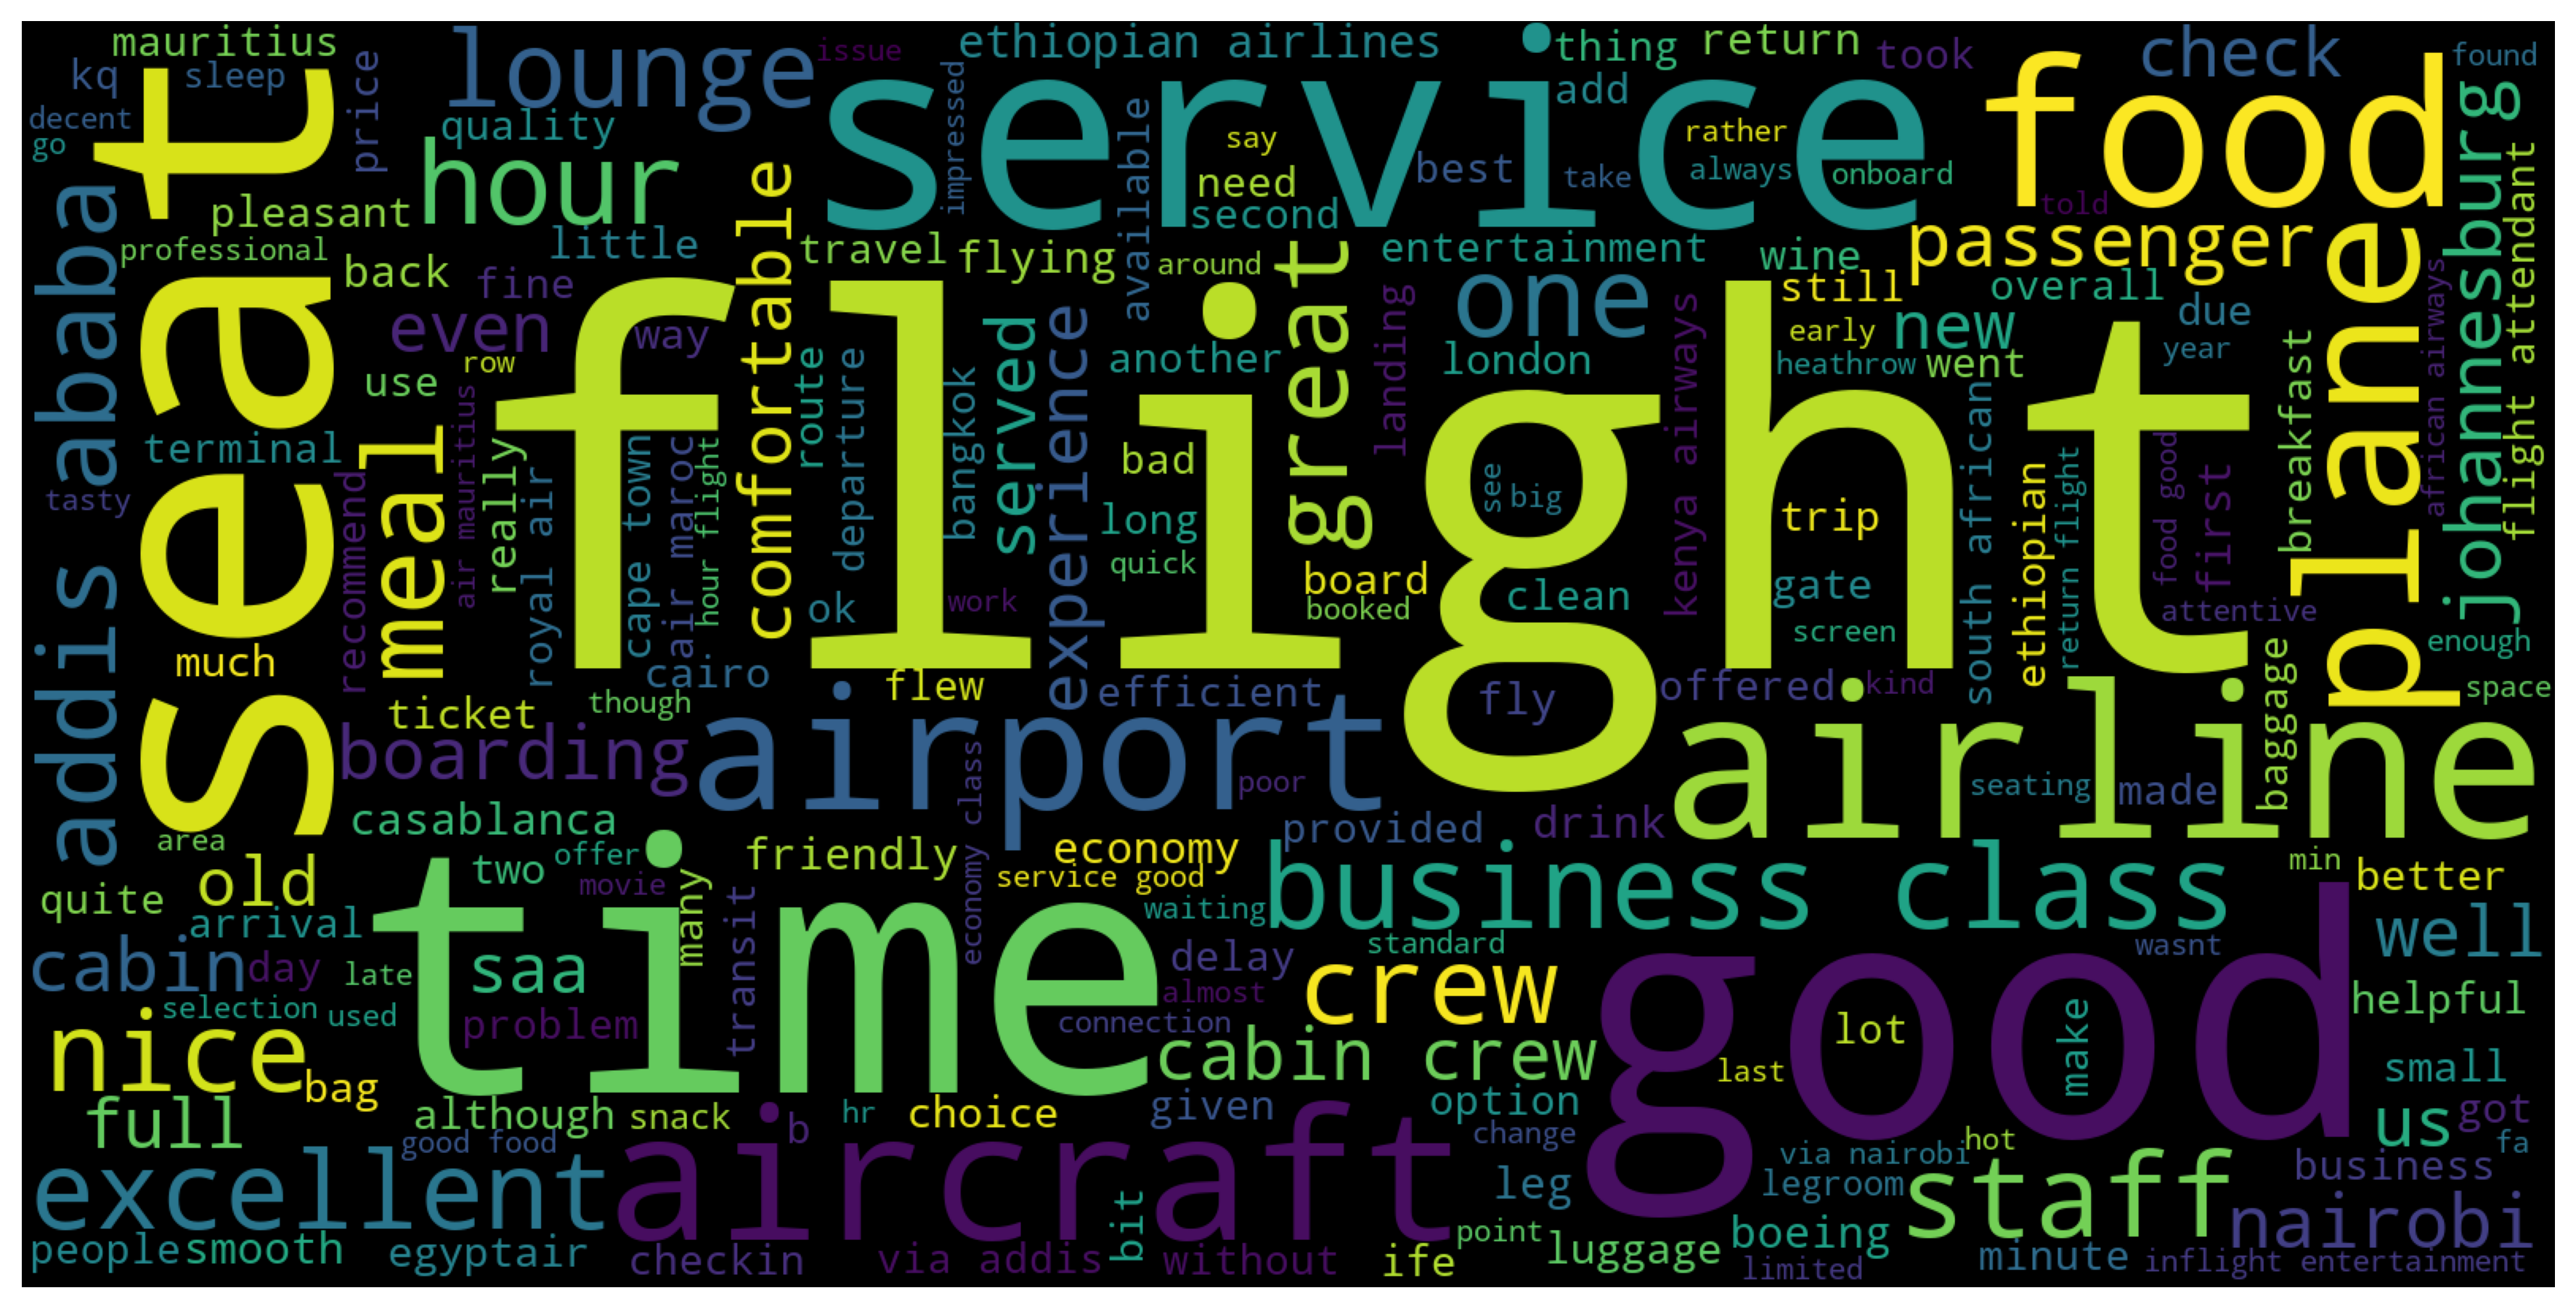

In [171]:
wordcloud = WordCloud(width=1600, height=800).generate(airlines_df.query(f"recommended == 1")\
                                             .review_text.str.cat(sep=' '))
plt.figure(1, figsize=(15, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the wordcloud above, the most meaningful words that stand out are mostly related to the in-flight attributes/characteristics e.g. food, service, seat, comfortable, staff, cabin crew, etc. 

Interesting to point out are the following: addis ababa (possibly related to Ethiopian Airlines), business class, and johannesburg (possibly related to South African Airlines).

**Most frequent words for negative (proxy: not recommended) reviews**

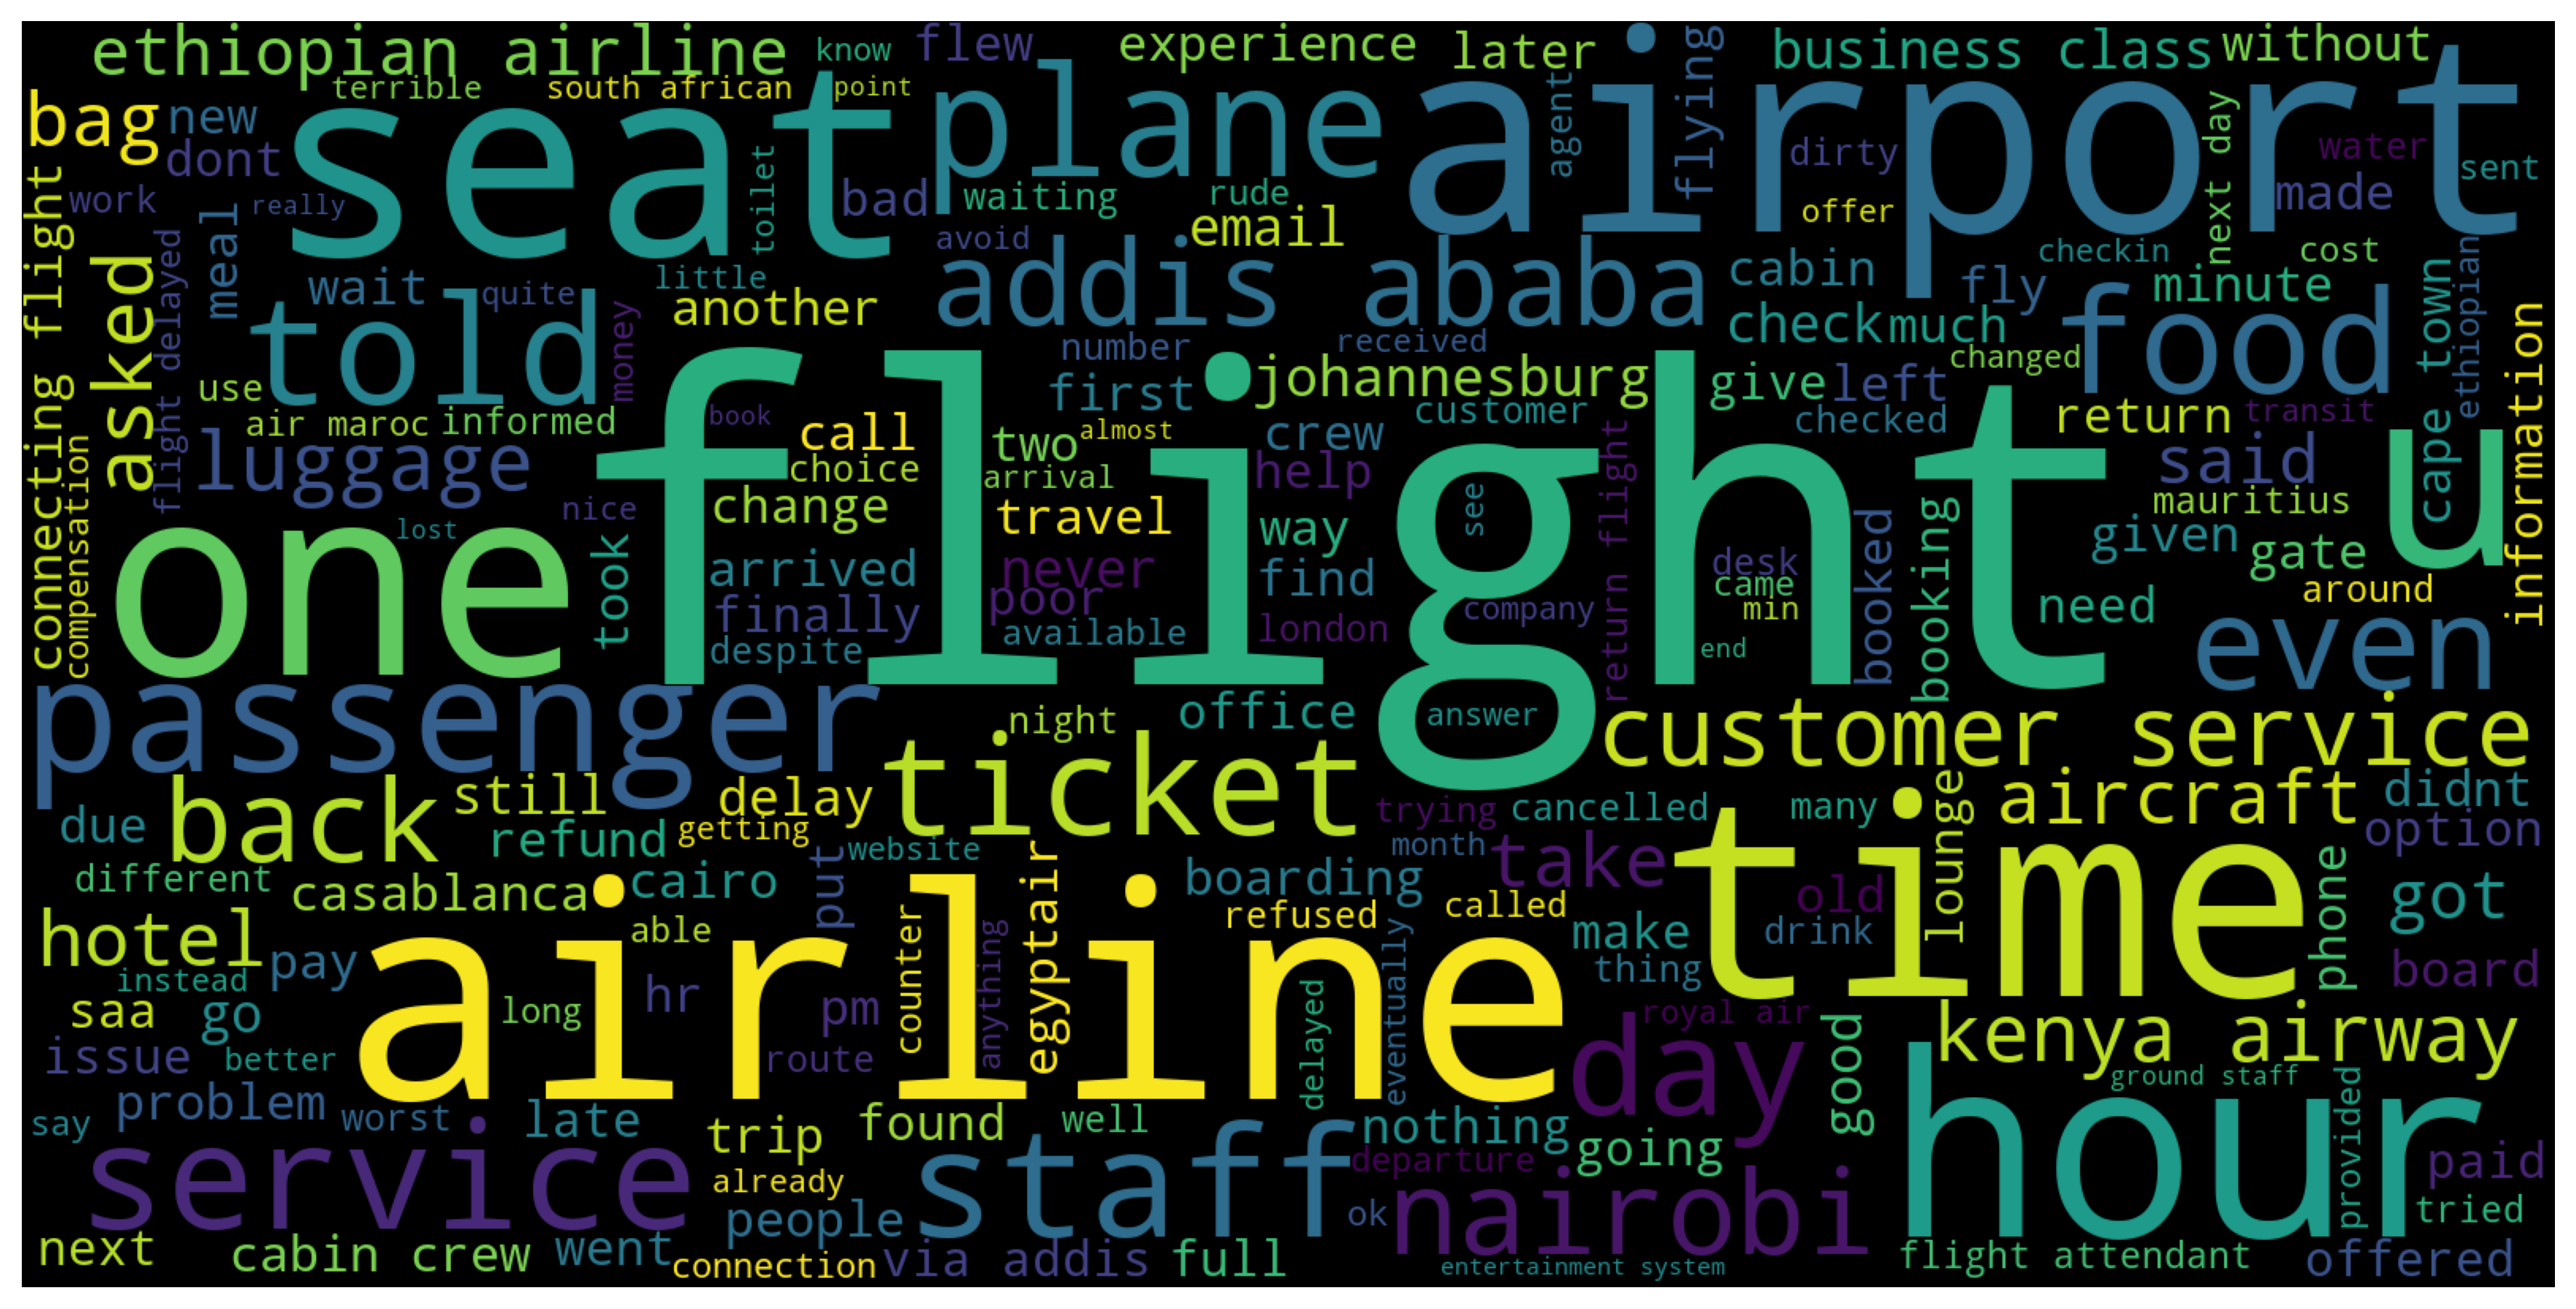

In [172]:
wordcloud = WordCloud(width=1600, height=800).generate(airlines_df.query(f"recommended == 0")\
                                             .review_text.str.cat(sep=' '))
plt.figure(1,figsize=(15, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the wordcloud above, a lot of the meaningful words that stand out are again mostly related to the in-flight attributes/characteristics e.g. food, service, seat, staff, plane, etc.

We also note words like customer service (hinting at bad customer service), ticket (hinting at problems with tickets), luggage (lost luggage?) and less prominent, delay(ed flights).

Interestingly, addis ababa (related to Ethiopian airlines) also shows up in the frequent negative words alongside kenya airway (well, this is wayyy more explicit )